In [5]:
%matplotlib inline
%precision 3

from numpy.random import randn
import numpy as np
import pandas as pd
np.random.seed(123)
import os
import re
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_rows = 10

import datetime

from numpy import nan as NA

In [6]:
#!powershell -command "& {gc NCDB_1999_to_2014.csv -head 10}"
#!powershell -command "& {gc NCDB_1999_to_2014_s.csv -head 10}"

In [7]:
#accident = pd.read_csv('NCDB_1999_to_2014.csv', engine = 'python')
#accident = pd.read_csv('NCDB_1999_to_2014_s.csv', engine = 'python')
accident = pd.read_csv('../../data/NCDB_1999_to_2014_s.csv', engine = 'python') #-- small
#accident = pd.read_csv('../../data/NCDB_1999_to_2014.csv', engine = 'python') # -- full

In [8]:
#replace all column head to lower case.

accident.columns = accident.columns.map(lambda x: x[:].lower())
accident

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_id,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user
0,2013,06,2,12,2,02,21,02,1,1,...,02,01,2005,01,M,28,11,2,02,1
1,2013,06,2,09,2,01,06,02,1,1,...,01,11,2008,01,F,42,11,1,02,1
2,2013,06,2,09,2,01,06,02,1,1,...,01,11,2008,02,M,04,12,2,01,2
3,2013,06,2,09,2,01,06,02,1,1,...,01,11,2008,03,F,33,98,2,UU,U
4,2013,06,2,08,2,02,36,02,1,1,...,01,01,2005,01,F,44,11,2,02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491543,2014,UU,U,UU,2,UU,UU,01,U,U,...,13,07,UUUU,01,M,24,11,1,NN,1
491544,2014,UU,U,23,2,01,06,05,1,1,...,01,14,2006,01,M,29,96,2,09,5
491545,2014,UU,U,14,2,01,02,01,1,5,...,01,01,2006,01,F,UU,11,2,01,1
491546,2014,UU,U,22,1,01,06,01,2,4,...,01,22,UUUU,01,M,67,12,3,01,U


In [9]:
#check the non-numberic values in date-time columns

accident[accident['c_mnth'].str.contains('[^0-9]')|
         accident['c_wday'].str.contains('[^0-9]')|
         accident['c_hour'].str.contains('[^0-9]')]

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_id,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user
764,2013,06,2,UU,2,02,21,02,1,1,...,01,01,2009,01,F,53,11,2,02,1
765,2013,06,2,UU,2,02,21,02,1,1,...,02,01,2002,01,F,25,11,1,02,1
839,2013,06,2,UU,1,01,04,UU,1,1,...,01,01,2006,01,M,34,11,3,01,1
1242,2013,06,2,UU,2,03,21,02,1,1,...,01,08,2007,01,M,53,11,1,02,1
1243,2013,06,2,UU,2,03,21,02,1,1,...,02,01,1998,01,M,71,11,2,02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491543,2014,UU,U,UU,2,UU,UU,01,U,U,...,13,07,UUUU,01,M,24,11,1,NN,1
491544,2014,UU,U,23,2,01,06,05,1,1,...,01,14,2006,01,M,29,96,2,09,5
491545,2014,UU,U,14,2,01,02,01,1,5,...,01,01,2006,01,F,UU,11,2,01,1
491546,2014,UU,U,22,1,01,06,01,2,4,...,01,22,UUUU,01,M,67,12,3,01,U


In [10]:
#remove all special values (unknown to us) in date-time columns, prepare for using date series as index.
#make a copy "df" for further analysis, avoid mess up the original data "accident".

df = accident[:]
df[['c_mnth','c_wday','c_hour']]=df[['c_mnth','c_wday','c_hour']].replace('[^0-9]+',np.nan,regex=True)

#df.isnull().sum().sort_values()
df.dropna(axis=0,subset=['c_mnth','c_wday','c_hour'],inplace=True)
df

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_id,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user
0,2013,06,2,12,2,02,21,02,1,1,...,02,01,2005,01,M,28,11,2,02,1
1,2013,06,2,09,2,01,06,02,1,1,...,01,11,2008,01,F,42,11,1,02,1
2,2013,06,2,09,2,01,06,02,1,1,...,01,11,2008,02,M,04,12,2,01,2
3,2013,06,2,09,2,01,06,02,1,1,...,01,11,2008,03,F,33,98,2,UU,U
4,2013,06,2,08,2,02,36,02,1,1,...,01,01,2005,01,F,44,11,2,02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491519,2014,12,7,14,2,02,41,01,1,5,...,02,05,2008,01,M,44,11,1,02,1
491520,2014,12,7,14,2,02,41,01,1,5,...,02,05,2008,02,M,34,13,2,02,2
491521,2014,12,7,19,2,01,03,01,1,3,...,01,01,2001,01,F,35,11,2,02,1
491522,2014,12,7,19,2,01,03,01,1,3,...,01,01,2001,02,M,26,13,1,02,2


In [11]:
#generate the date-time column "date", and assign it as the index.

#df['date'] = pd.DatetimeIndex(df['c_year'].map(str) + '-' + df['c_mnth'] + '-' + df['c_wday'] + ' ' + df['c_hour'] + ':0:0')
df['date'] = pd.PeriodIndex(df['c_year'].map(str) + '-' + df['c_mnth'], freq='M')
df

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user,date
0,2013,06,2,12,2,02,21,02,1,1,...,01,2005,01,M,28,11,2,02,1,2013-06
1,2013,06,2,09,2,01,06,02,1,1,...,11,2008,01,F,42,11,1,02,1,2013-06
2,2013,06,2,09,2,01,06,02,1,1,...,11,2008,02,M,04,12,2,01,2,2013-06
3,2013,06,2,09,2,01,06,02,1,1,...,11,2008,03,F,33,98,2,UU,U,2013-06
4,2013,06,2,08,2,02,36,02,1,1,...,01,2005,01,F,44,11,2,02,1,2013-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491519,2014,12,7,14,2,02,41,01,1,5,...,05,2008,01,M,44,11,1,02,1,2014-12
491520,2014,12,7,14,2,02,41,01,1,5,...,05,2008,02,M,34,13,2,02,2,2014-12
491521,2014,12,7,19,2,01,03,01,1,3,...,01,2001,01,F,35,11,2,02,1,2014-12
491522,2014,12,7,19,2,01,03,01,1,3,...,01,2001,02,M,26,13,1,02,2,2014-12


In [12]:
df.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            491514, 491515, 491516, 491517, 491518, 491519, 491520, 491521,
            491522, 491523],
           dtype='int64', length=488078)

In [13]:
# this line use 'date' as index, meke 'df' becoming time series.

df=df.set_index('date')
df

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_id,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user
date,,,,,,,,,,,,,,,,,,,,,
2013-06,2013,06,2,12,2,02,21,02,1,1,...,02,01,2005,01,M,28,11,2,02,1
2013-06,2013,06,2,09,2,01,06,02,1,1,...,01,11,2008,01,F,42,11,1,02,1
2013-06,2013,06,2,09,2,01,06,02,1,1,...,01,11,2008,02,M,04,12,2,01,2
2013-06,2013,06,2,09,2,01,06,02,1,1,...,01,11,2008,03,F,33,98,2,UU,U
2013-06,2013,06,2,08,2,02,36,02,1,1,...,01,01,2005,01,F,44,11,2,02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12,2014,12,7,14,2,02,41,01,1,5,...,02,05,2008,01,M,44,11,1,02,1
2014-12,2014,12,7,14,2,02,41,01,1,5,...,02,05,2008,02,M,34,13,2,02,2
2014-12,2014,12,7,19,2,01,03,01,1,3,...,01,01,2001,01,F,35,11,2,02,1


In [14]:
# this code to check how many missing values.

# df.isnull().sum().sort_values()

In [15]:
# this code to check detail of missing values.

# df[df['c_vehs'].isnull()]


#### Proposed analytics for each selected category:
1. Category statistics (max, min, mean, etc.)
2. Trend over the whole period (increase, decrease, fluky)
3. Correlation between selected category and one or multiple other categories (as per table below)
The result of analysis for all selected categories will contribute to our recommendations in the conclusion. 
P.S.: We don't need to analyse all categories.

|Correlation combination|Collision date (day of week, hour)|Collision severity|Number of vehicles involved in collision|Collision configuration|Weather condition|Vehicle type|
|:--|:--|:--|:--|:--|:--|:--|
|Road alignment|R|R|R|R||NA|
|Vehicle type|R|R|R|R|R|NA|
|Vehicle model year|R|R|R|R|R|R|


##### Collision level data elements

|Data element|Columns|Column size|Definition|
|--|--|--|--|
|C_YEAR|1 – 4|4|Year|
|C_MNTH|5 – 6|2|Month|
|C_WDAY|7|1|Day of week|
|C_HOUR|8 – 9|2|Collision hour|
|C_SEV|10|1|Collision severity|
|C_VEHS|11 – 12|2|Number of vehicles involved in collision|
|C_CONF|13 – 14|2|Collision configuration|
|C_RCFG|15 – 16|2|Roadway configuration|
|C_WTHR|17|1|Weather condition|
|C_RSUR|18|1|Road surface|
|C_RALN|19|1|Road alignment|
|C_TRAF|20 – 21|2|Traffic control|

##### Vehicle level data elements

|Data element|Columns|Column size|Definition|
|--|--|--|--|
|V_ID|22 – 23|2|Vehicle sequence number|
|V_TYPE|24 – 25|2|Vehicle type|
|V_YEAR|26 – 29|4|Vehicle model year|



##### Person level data elements

|Data element|Columns|Column size|Definition|
|--|--|--|--|
|P_ID|30 – 31|2|Person sequence number|
|P_SEX|32|1|Person sex|
|P_AGE|33 – 34|2|Person age|
|P_PSN|35 – 36|2|Person position|
|P_ISEV|37|1|Medical treatment required|
|P_SAFE|38 – 39|2|Safety device used|
|P_USER|40|1|Road user class|


#### (1) Road Alignment

In [16]:
df.describe()

,c_year,c_sev
count,488078.000000,488078.000000
mean,2013.605571,1.984589
std,0.488728,0.123183
min,2013.000000,1.000000
25%,2013.000000,2.000000
50%,2014.000000,2.000000
75%,2014.000000,2.000000
max,2014.000000,2.000000


In [17]:
df_m=df.groupby(level=0)['c_sev'].count()
df_m

date
2013-06    21315
2013-07    29169
2013-08    29492
2013-09    28335
2013-10    28693
           ...  
2014-08    26962
2014-09    26226
2014-10    27297
2014-11    26625
2014-12    25404
Freq: M, Name: c_sev, Length: 19, dtype: int64

In [18]:
df_m.describe()

count       19.000000
mean     25688.315789
std       3225.382321
min      17710.000000
25%      23612.500000
50%      26625.000000
75%      28227.500000
max      29492.000000
Name: c_sev, dtype: float64

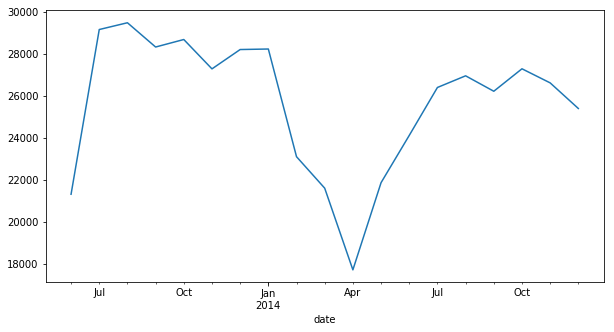

In [19]:
df_m.plot(figsize=(10,5))

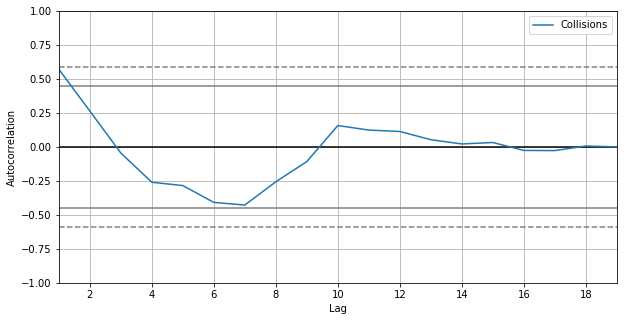

In [20]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10,5))
autocorrelation_plot(df_m,label='Collisions')

##### C_RALN

|Code| Description|
|--|:--|
|1| Straight and level|
|2 |Straight with gradient|
|3 |Curved and level|
|4 |Curved with gradient|
|5 |Top of hill or gradient|
|6 |Bottom of hill or gradient "Sag"|
|Q |Choice is other than the preceding values|
|U| Unknown|
|X |Jurisdiction does not provide this data element|

In [21]:
#df1 = df1.set_index('date')